<a href="https://colab.research.google.com/github/dwds186/alphaco_test/blob/main/0930monday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터프레임 생성

In [25]:
import numpy as np
import pandas as pd

print(np.__version__)
print(pd.__version__)

1.26.4
2.1.4


-첫번째 방법 : 리스트 활용


-두번째 방법 : 딕셔니러 활용(강사 선호)

In [26]:
data = [
    ["039900", "알파코", 1000000, 10.05],
    ["039910", "A", 500000, 1.05],
    ["039920", "B", 1000, 1.28]
]
#우리나라 주식 0으로 시작, 알파코가 상장, 주가 백만원, 상승률 10.05%

columns=["종목코드", "종목명", "현재가", "등락률"]

df=pd.DataFrame(data=data , columns = columns)
df

,종목코드,종목명,현재가,등락률
0,039900,알파코,1000000,10.05
1,039910,A,500000,1.05
2,039920,B,1000,1.28


In [27]:
data2={
    "종목코드" : ['039900', '039910', '039920'],
    "종목명" : ["알파코", "A", "B"]
}
df2=pd.DataFrame(data=data2)
df2
#columns를 넣지 않으면 그냥 0부터 시작해서 채워줌

,종목코드,종목명
0,039900,알파코
1,039910,A
2,039920,B


난수 1만개 만들어주세요 이런거 이제 chat gpt한테 물어보면 알아서 만들어줍니다.


잠깐 쉬고 할 것 : 파일 불러내기랑 불러오기

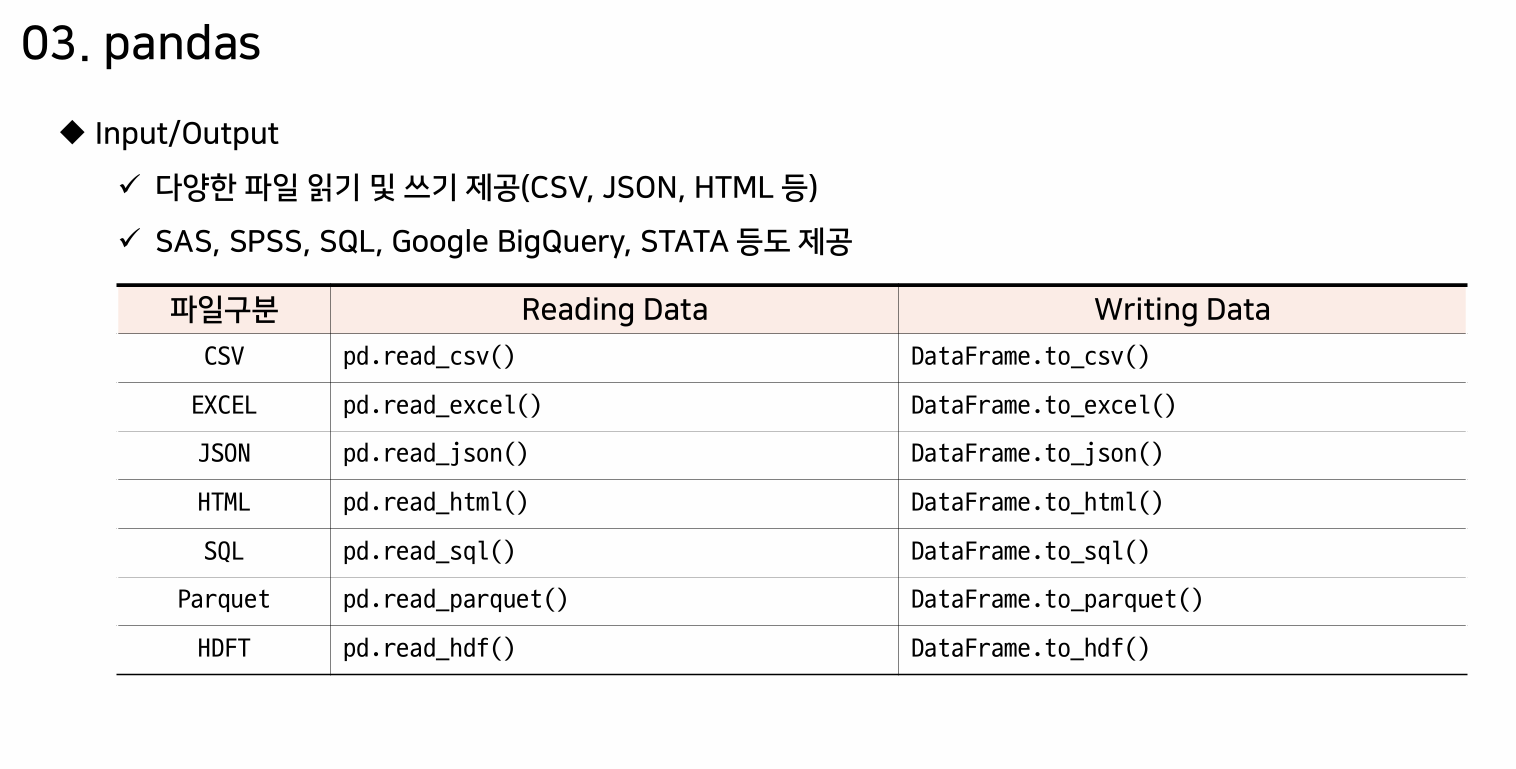

회사에서 사용하는 파일의 경우 파일 형식이 정말 다양함

분석을 하려면 data frame 형태로 만들어야 함

판다스로 바로 불러올 수 없는 형식의 파일일 경우에는 변환을 한 이후에 판다스로 불러오게 됩니다



after lunch

In [28]:
import pandas as pd
import random
import string


# Regenerating the dictionary where each key (종목코드, 종목명, 현재가, 등락률) has a list of values

data_dict = {
    "종목코드": [],
    "종목명": [],
    "현재가": [],
    "등락률": []
}

# Function to generate simpler 종목코드 and 종목명 ensuring the 종목코드 starts with '0'
def generate_code_name_for_dict(existing_codes):
    while True:
        code = '0' + ''.join(random.choices(string.digits, k=5))  # Ensure it starts with '0'
        name = ''.join(random.choices(string.ascii_uppercase, k=2))  # Simpler 종목명 with 2 letters
        if code not in existing_codes:
            return code, name

# Generating 10,000 rows of data
existing_codes_for_dict = set()

for _ in range(10000):
    code, name = generate_code_name_for_dict(existing_codes_for_dict)
    existing_codes_for_dict.add(code)
    current_price = random.randint(1000, 1000000)  # Simpler current price
    change_rate = round(random.uniform(-5, 5), 2)  # Simpler change rate

    data_dict["종목코드"].append(code)
    data_dict["종목명"].append(name)
    data_dict["현재가"].append(current_price)
    data_dict["등락률"].append(change_rate)

# Previewing a portion of the dictionary
data_dict_preview = {k: data_dict[k][:5] for k in data_dict}
#data_dict에는 만개의 데이터가 전부 들어가 있음
pd.DataFrame(data_dict_preview)

,종목코드,종목명,현재가,등락률
0,084088,VK,172243,0.73
1,098143,RG,520991,4.64
2,002562,FE,82311,3.06
3,070235,WH,966300,-0.61
4,095136,TM,741265,-1.93


In [29]:
df2 = pd.DataFrame(data_dict_preview)
df2

,종목코드,종목명,현재가,등락률
0,084088,VK,172243,0.73
1,098143,RG,520991,4.64
2,002562,FE,82311,3.06
3,070235,WH,966300,-0.61
4,095136,TM,741265,-1.93


In [30]:
df2.head(3) # ()안에 숫자를 넣어서 행의 개수를 조절할 수 있음


,종목코드,종목명,현재가,등락률
0,084088,VK,172243,0.73
1,098143,RG,520991,4.64
2,002562,FE,82311,3.06


In [31]:
df2.tail(1)

,종목코드,종목명,현재가,등락률
4,095136,TM,741265,-1.93


In [32]:
df2.info()
#numpy에 있는 데이터 타입이 출력됨
#넘파이를 기반으로 판다스가 만들어졌기 때문

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목코드    5 non-null      object 
 1   종목명     5 non-null      object 
 2   현재가     5 non-null      int64  
 3   등락률     5 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


In [33]:
df2.describe()
#수치 데이터에 대한 개수를 표시함
#4분위수 등의 정보도 볼 수 있음

,현재가,등락률
count,5.000000,5.000000
mean,496622.000000,1.178000
std,373469.145197,2.673232
min,82311.000000,-1.930000
25%,172243.000000,-0.610000
50%,520991.000000,0.730000
75%,741265.000000,3.060000
max,966300.000000,4.640000


In [34]:
data2 = {
    "종목코드" : ['039900', '039910', '039920'],
    "종목명" : ["알파코", "A", "B"],
    "현재가" : [10000000, 500000, 1000],
    "등락률" : [10.05, 1.05, 1.28]
}

df2 = pd.DataFrame(data = data2)
df2

,종목코드,종목명,현재가,등락률
0,039900,알파코,10000000,10.05
1,039910,A,500000,1.05
2,039920,B,1000,1.28


In [35]:
df2=df2.set_index("종목코드")
df2

,종목명,현재가,등락률
종목코드,,,
039900,알파코,10000000,10.05
039910,A,500000,1.05
039920,B,1000,1.28


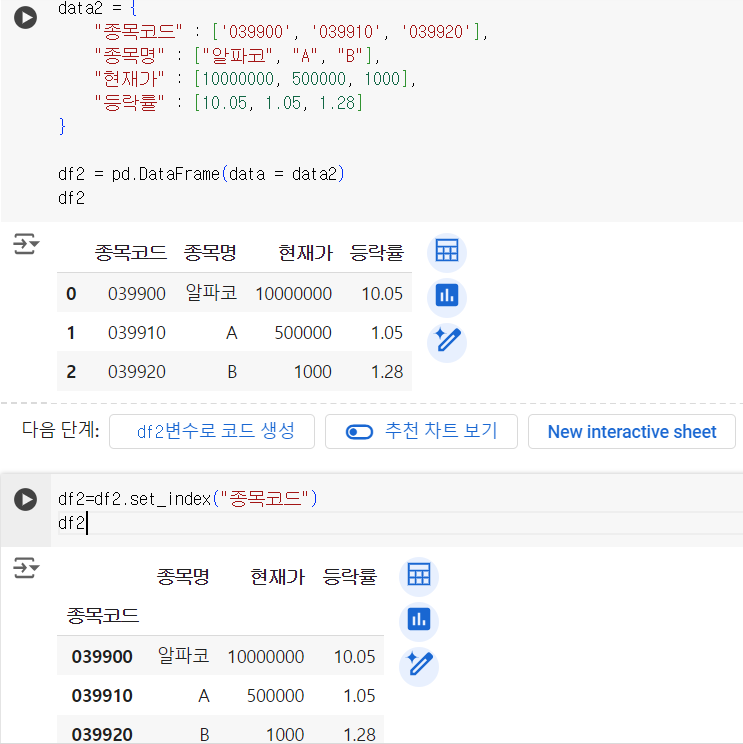

In [36]:
df2.reset_index() #이렇게 하면 다시 index 였던 것이 해제됨
#df2.reset_index(drop=True) -> 참조하던 index를 드랍 날린다는 의미

,종목코드,종목명,현재가,등락률
0,039900,알파코,10000000,10.05
1,039910,A,500000,1.05
2,039920,B,1000,1.28


In [37]:
from pandas import DataFrame

data = [
    ["알파코", 10000000, 10.05],
    ["A", 500000, 1.05],
    ["B", 1000, 1.28]
]

index = ["039900", "039910", "039900"]
columns = ["종목명", "현재가", "등락률"]
df = DataFrame(data=data, index=index, columns=columns)
df

,종목명,현재가,등락률
039900,알파코,10000000,10.05
039910,A,500000,1.05
039900,B,1000,1.28


나중에 index 꼬였을 때가 제일 복잡함
지금은 index가 하나이지만 나중에는 멀티 인덱스라고 해서 인덱스 개수 엄청 늘어남

In [38]:
df.index

Index(['039900', '039910', '039900'], dtype='object')

In [39]:
df.index.shape

(3,)

In [40]:
df.values

array([['알파코', 10000000, 10.05],
       ['A', 500000, 1.05],
       ['B', 1000, 1.28]], dtype=object)

In [41]:
df.values.shape

(3, 3)

In [42]:
df.현재가

,현재가
039900,10000000
039910,500000
039900,1000


In [43]:
df["현재가"] # df.현재가 랑 같은 거임 그냥 방식이 2가지 # 시리즈 형태

,현재가
039900,10000000
039910,500000
039900,1000


In [44]:
df[["현재가"]] #위와 살짝 다름 -> 출력값 형태가 다르다는 뜻은 클래스가 다르다는 의미임 # 데이터 프레임 형태

,현재가
039900,10000000
039910,500000
039900,1000


클래스가 다르다면
속성과 메서드가 다르다는 사실을 항상 염두에 두어야 함



나중에 코드 핸들링 하다 보면 분명히 attribute error에 부딪히게 됨
현재 내가 다루는 변수가 시리즈 타입인지 데이터 프레임 타입인지 항상 고려하세요

##로우 인덱싱

- loc, iloc
loc : label을 기준으로 인덱싱
iloc : index를 기준으로 인덱싱

In [45]:
import seaborn as sns
sns.__version__

'0.13.1'

In [46]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [47]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [48]:
iris=sns.load_dataset("iris")
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


iris.loc[행, 열]

In [49]:
iris.loc[[0,9], ['sepal_width', 'species']]

,sepal_width,species
0,3.5,setosa
9,3.1,setosa


In [50]:
iris.iloc[[0,9], [1,4]]

,sepal_width,species
0,3.5,setosa
9,3.1,setosa


In [51]:
# 일종의 조건식
# 값을 가져오고 싶다면, true 값만 가져옴 # 이게 프로그래밍의 기본 true값만 가지고 오기
#iris['sepal_width'] > 3.5


In [52]:
iris.loc[iris['sepal_width'] >= 4.0 , :]

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


인덱스가 14, 15, 32, 33으로 나와 있네...
중간에 없는 인덱스도 있고

In [53]:
iris.loc[iris['sepal_width'] >= 4.0 , :].reset_index(drop=True)
# 데이터 얻어오기 뿐만 아니라 인덱스까지 처리해주어야 하나의 완성된 코드가 된다고 생각해주세요


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,4.0,1.2,0.2,setosa
1,5.7,4.4,1.5,0.4,setosa
2,5.2,4.1,1.5,0.1,setosa
3,5.5,4.2,1.4,0.2,setosa


In [54]:
result=iris.loc[iris['sepal_width'] >= 4.0 , :].reset_index(drop=True)
result

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,4.0,1.2,0.2,setosa
1,5.7,4.4,1.5,0.4,setosa
2,5.2,4.1,1.5,0.1,setosa
3,5.5,4.2,1.4,0.2,setosa


In [55]:
#문자열 기반으로 조회
iris.loc[iris['species']=="setosa", : ].reset_index(drop=True)
# iris.loc[iris['species']=="setosa", : ].reset_index(drop=True).head(1) 이런식으로 확인하면 됨

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [56]:
result=iris.loc[iris['species']=="setosa", : ].reset_index(drop=True)

iris.loc[iris['species']=='setosa', : ].reset_index(drop=True)

iris.loc[:,:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [57]:
#다중 조건
#iris.loc[(조건식1) & | (조건식2), : ]
#iris.loc[(조건식1) & (조건식2), : ]

In [58]:
iris.loc[(iris['species']=='setosa') & (iris['sepal_width'] >= 4.0), : ]

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [59]:
iris.loc[(iris['species']=='versicolor') & (iris['sepal_width'] >= 3.2), : ]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
70,5.9,3.2,4.8,1.8,versicolor
85,6.0,3.4,4.5,1.6,versicolor


In [60]:
iris.loc[(iris['species']=='versicolor') & (iris['sepal_width'] >= 3.2), : ]

#소괄호 넣는 이유는 분명히 어디 선가 빼먹게 됨 문법 에러 발생 함


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
70,5.9,3.2,4.8,1.8,versicolor
85,6.0,3.4,4.5,1.6,versicolor


In [61]:
iris.loc[(iris['species'] == "virginica") & (iris['sepal_width']  >= 3.2) & (iris['petal_length']  >= 6.2), :]

,sepal_length,sepal_width,petal_length,petal_width,species
117,7.7,3.8,6.7,2.2,virginica
131,7.9,3.8,6.4,2.0,virginica


In [62]:
iris.loc[(iris['species'] == "virginica") & (iris['sepal_width']  >= 3.2) & (iris['petal_length']  >= 6.2), :].reset_index(drop=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,3.8,6.7,2.2,virginica
1,7.9,3.8,6.4,2.0,virginica


##컬럼 추가하기
-

In [63]:
iris2=iris.copy()
iris2['newCol']=0
iris2['sepals'] = iris2['sepal_length'] + iris2['sepal_width']
iris2
#copy를 하지 않으면 혹시 원본 데이터에 영향을 줄 수도 있어서 copy()를 하겠음

,sepal_length,sepal_width,petal_length,petal_width,species,newCol,sepals
0,5.1,3.5,1.4,0.2,setosa,0,8.6
1,4.9,3.0,1.4,0.2,setosa,0,7.9
2,4.7,3.2,1.3,0.2,setosa,0,7.9
3,4.6,3.1,1.5,0.2,setosa,0,7.7
4,5.0,3.6,1.4,0.2,setosa,0,8.6
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,9.7
146,6.3,2.5,5.0,1.9,virginica,0,8.8
147,6.5,3.0,5.2,2.0,virginica,0,9.5
148,6.2,3.4,5.4,2.3,virginica,0,9.6


In [64]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [65]:
# 삭제하겠습니다
from pandas import DataFrame

data = [
    ["알파코", 10000000, 10.05],
    ["A", 500000, 1.05],
    ["B", 1000, 1.28]
]

index = ["039900", "039910", "039900"]
columns = ["종목명", "현재가", "등락률"]
df = DataFrame(data=data, index=index, columns=columns)
df

,종목명,현재가,등락률
039900,알파코,10000000,10.05
039910,A,500000,1.05
039900,B,1000,1.28


In [66]:
df.drop("039900", axis=0)
#039900가 사라져서 하나 남았음
#axis=1로 하면 key error 발생
#axis가 0이면 일반적으로 행을 처리하는 것 반대로 axis가 1이면 열을 처리하는 것


,종목명,현재가,등락률
039910,A,500000,1.05


In [67]:
df.drop("종목명", axis=1)

,현재가,등락률
039900,10000000,10.05
039910,500000,1.05
039900,1000,1.28


In [68]:
df.drop("종목명", axis=1, inplace=True) #inplace라는 매개 변수는 사용하지 않는 것 추천drop("종목명", axis=1, inplace=True) #inplace라는 매개 변수는 사용하지 않는 것 추천
#inplace=True면 원본이 바로 수정됨
df

,현재가,등락률
039900,10000000,10.05
039910,500000,1.05
039900,1000,1.28


In [69]:
#컬럼명 변경

from pandas import DataFrame

data = [
    ["알파코", 10000000, 10.05],
    ["A", 500000, 1.05],
    ["B", 1000, 1.28]
]

index = ["039900", "039910", "039900"]
columns = ["종목명", "현재가", "등락률"]
df = DataFrame(data=data, index=index, columns=columns)
df2 = df.rename(columns={"종목명" : "code"})
df2

,code,현재가,등락률
039900,알파코,10000000,10.05
039910,A,500000,1.05
039900,B,1000,1.28


보면 알겠지만 method가 엄청 많음

https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html




In [70]:
data = [
    ["1,000", "1,100", '1,510'],
    ["1,410", "1,420", '1,790'],
    ["850", "900", '1,185'],
]
columns = ["03/02", "03/03", "03/04"]
df = DataFrame(data=data, columns=columns)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      object
 1   03/03   3 non-null      object
 2   03/04   3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


미션 : 문자를 숫자로 변경하고 싶어

In [71]:
data = [
    ["1,000", "1,100", '1,510'],
    ["1,410", "1,420", '1,790'],
    ["850", "900", '1,185'],
]
columns = ["03/02", "03/03", "03/04"]
df = DataFrame(data=data, columns=columns)
df
df.info()
print()
print()
print()
df = df.replace(',', '', regex=True).astype(int)
#type(df)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      object
 1   03/03   3 non-null      object
 2   03/04   3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes





,03/02,03/03,03/04
0,1000,1100,1510
1,1410,1420,1790
2,850,900,1185


##데이터 불러오기

In [72]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [73]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
iris.to_csv("iris_240930.csv", index=False)

파일 내보내기

In [75]:
import pandas as pd

df=pd.read_csv("iris_240930.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
iris.to_excel("iris_excel_240930.xlsx")


ModuleNotFoundError: No module named 'openpyxl'
주피터로 진행하면 발생하는 에러

이럴 경우에 라이브러리 업데이트 해주면 됩니다
requ~.txt에


In [77]:
print('hi')

hi


In [79]:
excel_df=pd.read_excel("iris_excel_240930.xlsx")
excel_df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica
